<a href="https://colab.research.google.com/github/romyhakimwardana/Data-Mining-Praktikum/blob/main/C1_2109116102_Romy_Hakim_W_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [103]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

Tabel Tabulasi

In [276]:
# dataframe dibuat dalam list
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).groupby(level=1).sum()
print(df)

   beef  butter  butter milk  canned beer  cling film/bags  curd  dental care  \
0     1       1            1            1                0     0            0   
1     0       0            0            0                1     1            1   
2     0       0            0            0                0     0            0   
3     0       0            0            0                0     0            0   

   detergent  dish cleaner  frankfurter  ...  sausage  semi-finished bread  \
0          0             1            2  ...        4                    0   
1          1             0            0  ...        0                    0   
2          0             0            0  ...        0                    1   
3          0             0            0  ...        0                    0   

   soda  specialty chocolate  sugar  tropical fruit  whipped/sour cream  \
0     1                    0      0               1                   0   
1     2                    1      1               0  

Tabel Support and Confident

In [277]:
# Dataframe dibuat dalam list
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# Ubah dataframe
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Buat apriori untuk mencari support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Cari association rules dengan Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Buat tabel support untuk itemset
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# Buat tabel support dan confident
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# Buat filter antecedents dan consequents
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# Buat kolom antecedent dan consequent 
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# Buat antecedent sebagai index dan sort berdasarkab confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# Buat tabel support dan confident yang sudah terfilter
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)

                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(sausage, whole milk, semi-finished bread)           5.26%
(sausage, yogurt, semi-finished bread)               5.26%
(sausage, yogurt, whole milk)                        5.26%
(semi-finished bread, yogurt, whole milk)            5.26%
(sausage, yogurt, whole milk, semi-finished bread)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
beef                         white bread   5.26%    100.0

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

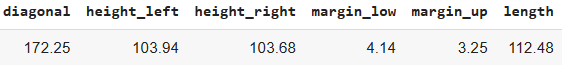
<!-- 1412 -->

In [106]:
import pandas as pd
import math

In [107]:
# Dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

In [108]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [109]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [110]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# mengambil data terdekat dengan target
nearest_data = df_sorted.head(K)

# menghitung jumlah data dengan label True dan False
true_count = nearest_data['is_genuine'].sum()
false_count = K - true_count

# menentukan hasil prediksi berdasarkan label terbanyak
if true_count > false_count:
    prediction = True
else:
    prediction = False
    
print('Hasil prediksi:', prediction)

Hasil prediksi: True


# (3) Analisis

> Nama : Romy Hakim Wardana

> Nim : 2109116102


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## Business Understanding

**China Scholarship Data - May 2019**

Tujuan dari dataset China Scholarship Data - May 2019 adalah untuk memahami profil penerima beasiswa China dan bagaimana pengalaman mereka dalam memperoleh beasiswa tersebut. Dataset ini dapat memberikan wawasan yang berguna bagi pihak yang ingin menyediakan beasiswa atau mendukung program beasiswa, termasuk lembaga pendidikan, organisasi nirlaba, atau pemerintah.

## Data Understanding

### Collect Initial Data

In [188]:
import pandas as pd

In [189]:
# Dataset
df = pd.read_csv("cleaned.csv")

In [190]:
df

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [191]:
df.head()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,0,0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,1,1,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [192]:
df.tail()

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH
3575,3605,East China University of Science and Technology,Sociology of Law,Phd,English,38950.0,1,1,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH


In [193]:
df.shape

(3576, 16)

In [194]:
df.describe()

,schol_id,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Year,Accomodation_To_Pay,Expense_To_Pay
count,3576.000000,3453.000000,3576.000000,3576.000000,3576.000000,3453.000000,3576.000000,3576.000000,3576.000000
mean,1816.503076,20531.704315,0.232942,0.251119,8433.516499,28693.955980,2019.056208,1376.461969,1070.987136
std,1034.126355,12428.124918,0.422765,0.433717,9519.340675,15341.450293,0.230355,2802.526970,601.297528
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000
25%,923.750000,10625.000000,0.000000,0.000000,0.000000,20000.000000,2019.000000,400.000000,1000.000000
50%,1817.500000,20000.000000,0.000000,0.000000,6000.000000,26500.000000,2019.000000,900.000000,1000.000000
75%,2711.250000,26500.000000,0.000000,1.000000,11000.000000,34000.000000,2019.000000,1200.000000,1500.000000
max,3605.000000,80000.000000,1.000000,1.000000,69000.000000,148000.000000,2020.000000,24000.000000,2700.000000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   schol_id                 3576 non-null   int64  
 1   University               3576 non-null   object 
 2   Major                    3576 non-null   object 
 3   Level                    3576 non-null   object 
 4   Language                 3576 non-null   object 
 5   Tuition Covered          3453 non-null   float64
 6   Accomodation covered?    3576 non-null   int64  
 7   Living Expense Covered?  3576 non-null   int64  
 8   Tuition fees to pay      3576 non-null   int64  
 9   Original Tuition fee     3453 non-null   float64
 10  Start_Month              3576 non-null   object 
 11  Start_Year               3576 non-null   int64  
 12  Accomodation_To_Pay      3576 non-null   float64
 13  Accomodation_duration    3576 non-null   object 
 14  Expense_To_Pay          

### Describe Data

In [196]:
import pandas as pd
import numpy as np

In [197]:
df = pd.read_csv("cleaned.csv")

In [198]:
# df1 isinya dataset dengan label target Phd
df1 = df[df['Level'] == 'Phd']

# Menampilkan hasil filter
print(df1)

      schol_id                                       University  \
2884      2914                       Zhejiang Normal University   
2885      2915                       Zhejiang Normal University   
2886      2916                       Zhejiang Normal University   
2887      2917                       Zhejiang Normal University   
2888      2918                       Zhejiang Normal University   
...        ...                                              ...   
3571      3601  East China University of Science and Technology   
3572      3602  East China University of Science and Technology   
3573      3603  East China University of Science and Technology   
3574      3604  East China University of Science and Technology   
3575      3605  East China University of Science and Technology   

                                                Major Level Language  \
2884                                       Psychology   Phd  English   
2885                                          Physi

In [199]:
# df2 isinya dataset dengan label target bukan Phd
df2 = df[df['Level'] != 'Phd']

# Menampilkan hasil filter
print(df2)

      schol_id                                         University  \
0            1  Shanghai University of Traditional Chinese Med...   
1            2     Changchun University of Science and Technology   
2            3     Changchun University of Science and Technology   
3            4     Changchun University of Science and Technology   
4            5                                 Qingdao University   
...        ...                                                ...   
2879      2909             Xi'an International Studies University   
2880      2910             Xi'an International Studies University   
2881      2911  Beijing Foreign Studies University-Internation...   
2882      2912  Beijing Foreign Studies University-Internation...   
2883      2913  Beijing Foreign Studies University-Internation...   

                                                  Major       Level Language  \
0                                   Summer School (TCM)  Non-Degree  English   
1     Prepa

In [200]:
# df3 isinya dataset dengan label target Qingdao University
df3 = df[df['University'] == 'Qingdao University']

# Menampilkan hasil filter
print(df3)

     schol_id          University                                   Major  \
4           5  Qingdao University      Long-term Chinese Language Program   
5           6  Qingdao University      Long-term Chinese Language Program   
183       213  Qingdao University       Bachelor of Software Engineering    
184       214  Qingdao University  Bachelor's Program of Chinese Language   

          Level Language  Tuition Covered  Accomodation covered?  \
4    Non-Degree  Chinese           7000.0                      1   
5    Non-Degree  Chinese          14000.0                      1   
183    Bachelor  English          20000.0                      0   
184    Bachelor  Chinese          18000.0                      1   

     Living Expense Covered?  Tuition fees to pay  Original Tuition fee  \
4                          1                    0                7000.0   
5                          1                    0               14000.0   
183                        0                    

In [201]:
# df4 isinya dataset dengan label target UNIVERSITAS MULAWARMAN
df4 = df['Major']

# Menampilkan hasil filter
print(df4.tail)

<bound method NDFrame.tail of 0                                     Summer School (TCM)
1       Preparatory Program of Humanities Direction(Pa...
2       Preparatory Program of Business Direction(Path A)
3       Preparatory Program of Science and Engineering...
4                      Long-term Chinese Language Program
                              ...                        
3571                Environmental Science and Engineering
3572      Power Engineering and Engineering Thermophysics
3573                                  Thermal Engineering
3574             Synthesis of Fine Chemical and Molecular
3575                                     Sociology of Law
Name: Major, Length: 3576, dtype: object>


In [202]:
# df4 isinya dataset dengan label target UNIVERSITAS MULAWARMAN
df4 = df[df['Tuition Covered'] < 10000.0]

# Menampilkan hasil filter
print(df4)

      schol_id                                         University  \
0            1  Shanghai University of Traditional Chinese Med...   
4            5                                 Qingdao University   
12          13             Zhengzhou University of Light Industry   
13          14             Zhengzhou University of Light Industry   
14          15       Beijing Chinese Language and Culture College   
...        ...                                                ...   
3443      3473              North China Electric Power University   
3531      3561                 Tianjin Foreign Studies University   
3532      3562                 Tianjin Foreign Studies University   
3533      3563                 Tianjin Foreign Studies University   
3534      3564                 Tianjin Foreign Studies University   

                                                  Major       Level Language  \
0                                   Summer School (TCM)  Non-Degree  English   
4          

In [203]:
df.select_dtypes(include=np.number)

,schol_id,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Year,Accomodation_To_Pay,Expense_To_Pay
0,1,7500.0,0,0,0,7500.0,2020,9750.0,1000.0
1,2,10000.0,0,0,10000,20000.0,2019,1500.0,1500.0
2,3,10000.0,0,0,10000,20000.0,2019,1500.0,1500.0
3,4,10000.0,0,0,10000,20000.0,2019,1500.0,1500.0
4,5,7000.0,1,1,0,7000.0,2019,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3571,3601,38950.0,1,1,0,38950.0,2019,0.0,0.0
3572,3602,38950.0,1,1,0,38950.0,2019,0.0,0.0
3573,3603,38950.0,1,1,0,38950.0,2019,0.0,0.0
3574,3604,38950.0,1,1,0,38950.0,2019,0.0,0.0


In [204]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

In [205]:
tampil("Tuition Covered")

Nilai minimum         : 0.0
Nilai maksimum        : 80000.0
Nilai standar deviasi : 12428.124917942632
Nilai mean            : 20531.70431508833


In [206]:
tampil("Original Tuition fee")

Nilai minimum         : 0.0
Nilai maksimum        : 148000.0
Nilai standar deviasi : 15341.450293450247
Nilai mean            : 28693.95598030698


In [207]:
tampil("Accomodation_To_Pay")

Nilai minimum         : 0.0
Nilai maksimum        : 24000.0
Nilai standar deviasi : 2802.5269701491466
Nilai mean            : 1376.4619686800895


In [208]:
tampil("Expense_To_Pay")

Nilai minimum         : 0.0
Nilai maksimum        : 2700.0
Nilai standar deviasi : 601.2975283474238
Nilai mean            : 1070.9871364653243


### Explore Data

In [209]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [210]:
# Dataset
df = pd.read_csv("cleaned.csv")

#### Visualisasi Comparison

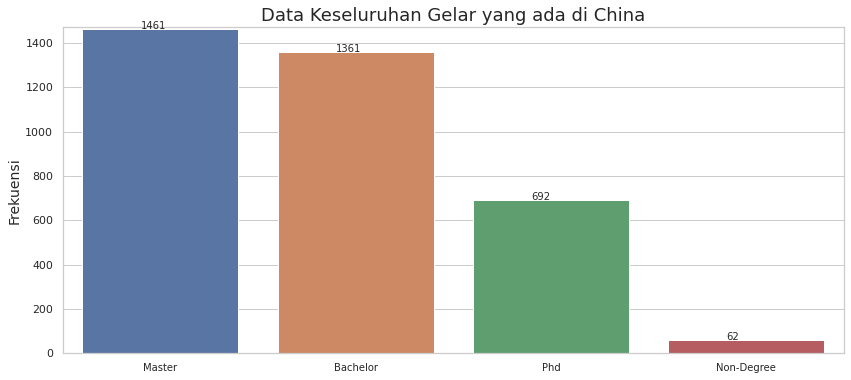

In [211]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Level'].fillna('NaN').value_counts().index[0:4]
count = df['Level'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan Gelar yang ada di China', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['Level'].fillna('NaN').value_counts()[0]+10)

plt.show()

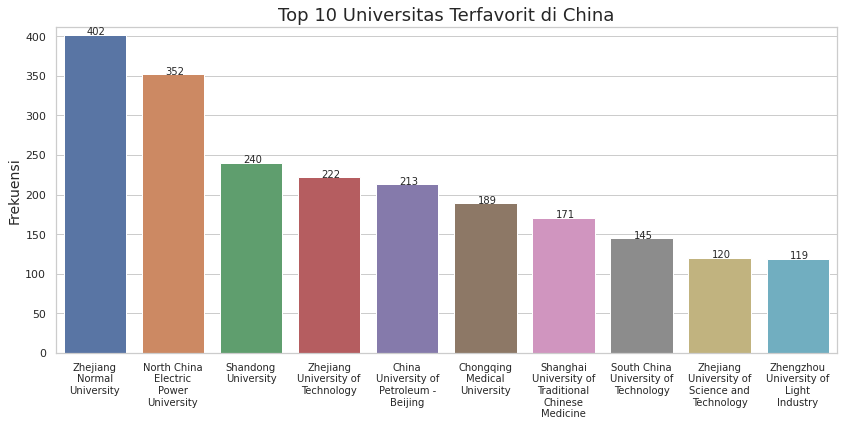

In [212]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['University'].fillna('NaN').value_counts().index[0:10]
count = df['University'].fillna('NaN').value_counts()[0:10]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Top 10 Universitas Terfavorit di China', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y=count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['University'].fillna('NaN').value_counts()[0]+10)

plt.show()

#### Visualisasi Distribution

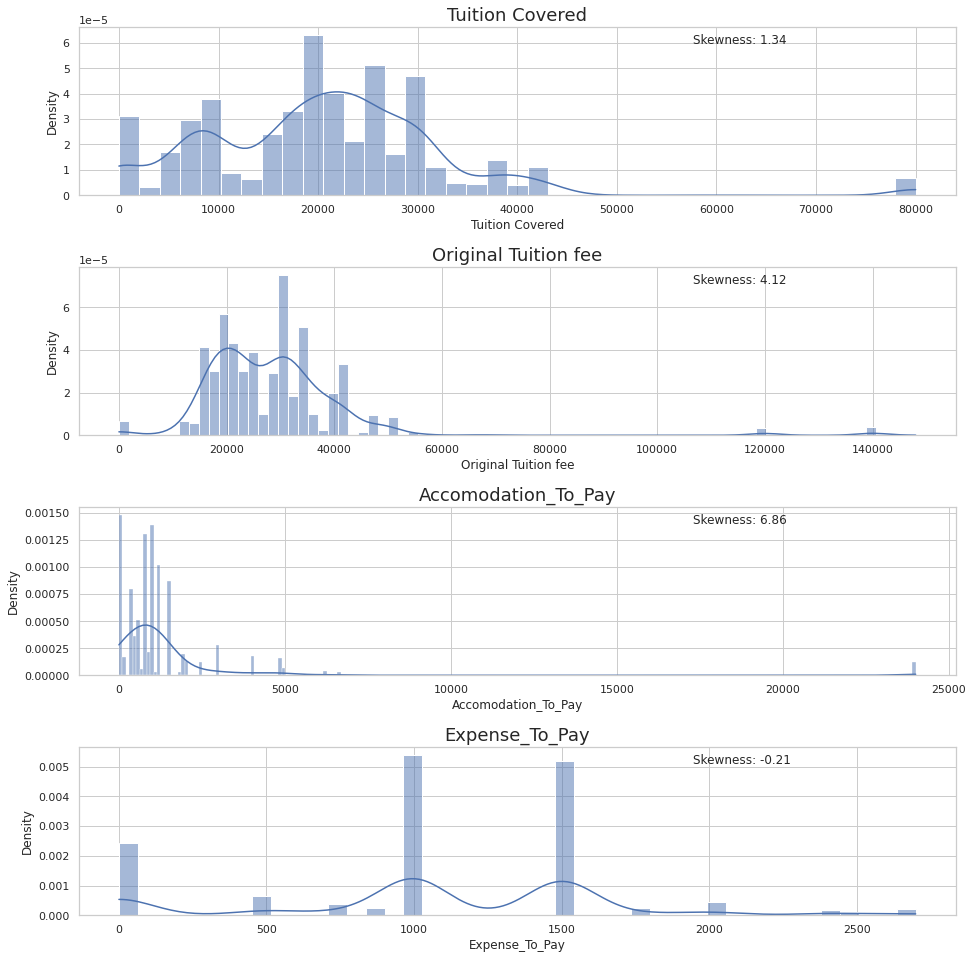

In [213]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['Tuition Covered', 'Original Tuition fee', 'Accomodation_To_Pay', 'Expense_To_Pay']

# Membuat diagram
fig, ax = plt.subplots(4, figsize=(14, 14))
fig.tight_layout(pad=4)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    ax.annotate(f"Skewness: {df[col].skew():.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

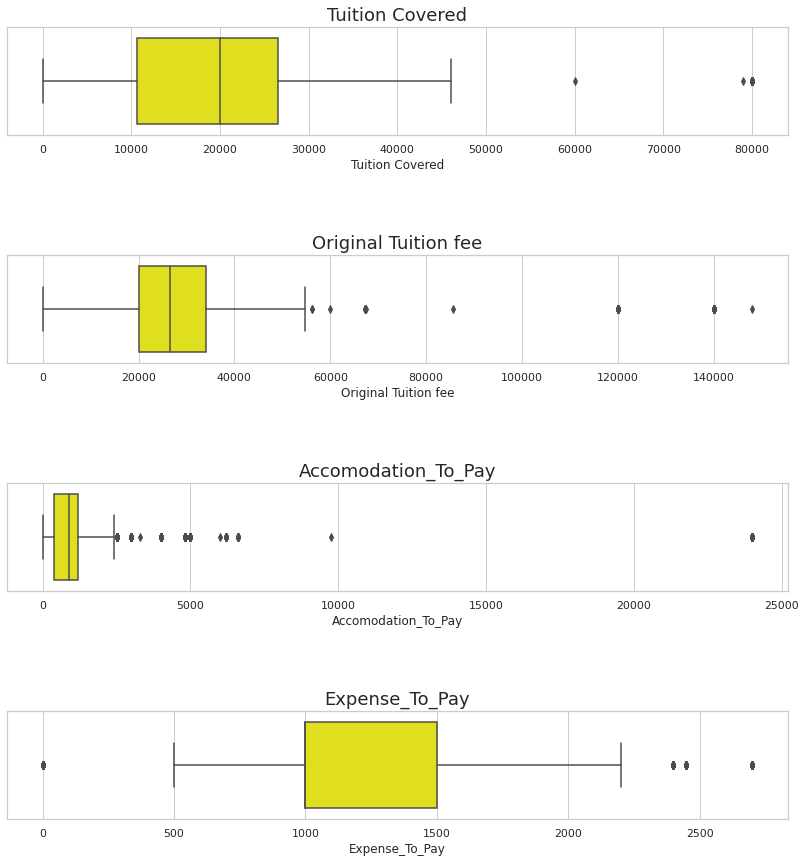

In [214]:
num_cols = ['Tuition Covered', 'Original Tuition fee', 'Accomodation_To_Pay', 'Expense_To_Pay']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'yellow')
    ax[i].set_title(col, fontsize = 18)

plt.show()


#### Visualisasi Relationship

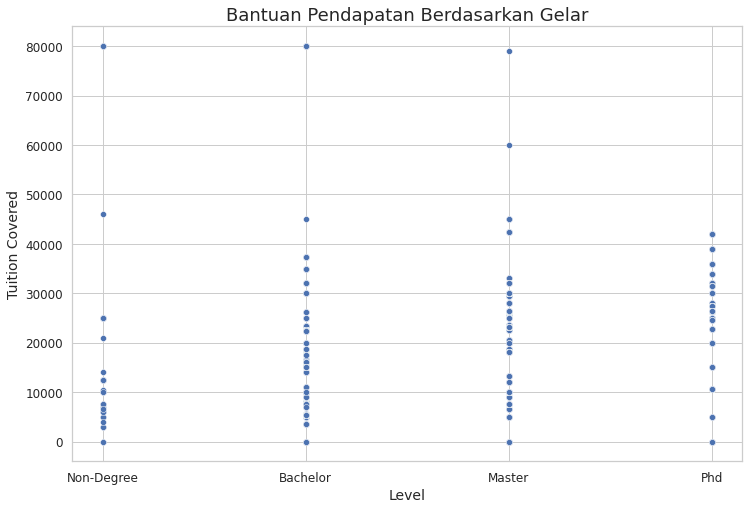

In [215]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="Level", y="Tuition Covered")
ax.set_title('Bantuan Pendapatan Berdasarkan Gelar', fontsize=18)
ax.set_xlabel('Level', fontsize=14)
ax.set_ylabel('Tuition Covered', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Visualisasi Composition

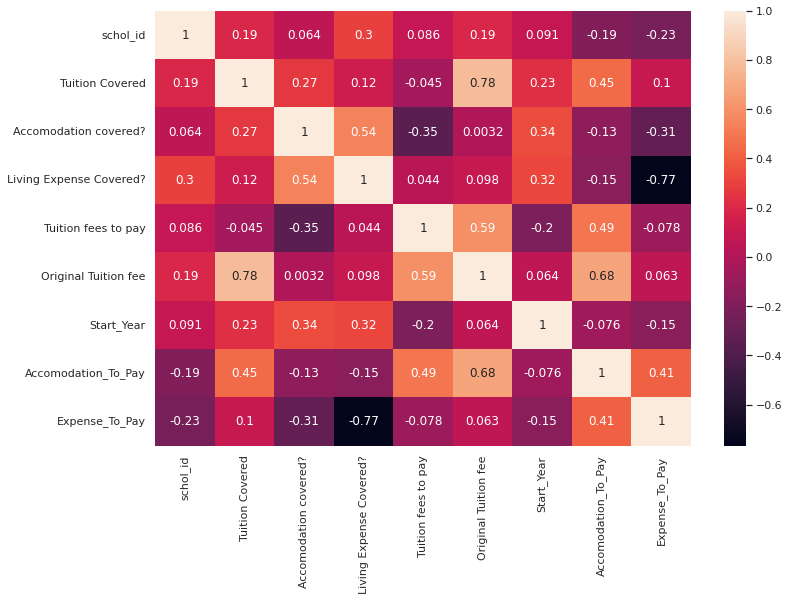

In [216]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

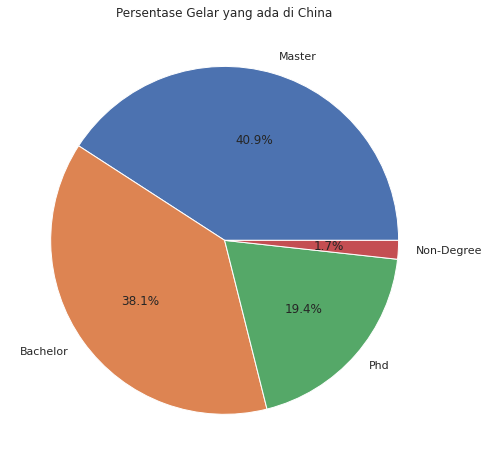

In [217]:
# Menghitung kolom level
level_count = df['Level'].value_counts()

# Membuat Diagram Pie untuk kolom level
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase Gelar yang ada di China')
plt.show()

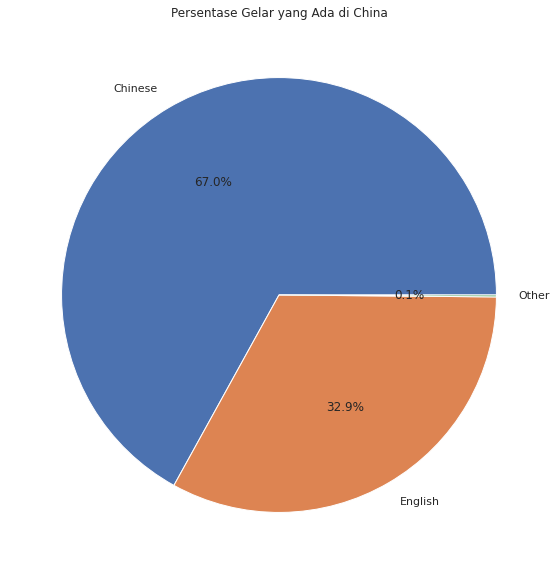

In [218]:
# Menghitung kolom language
language_count = df['Language'].value_counts()

# Membuat threshold
threshold = 10

# Mengambil index dari threshold
other_index = language_count[language_count < threshold].index

# Membuat baris baru dalam kolom language
language_count['Other'] = language_count[other_index].sum()

# Menghapus index dari threshold
language_count.drop(other_index, inplace=True)

# Membuat Diagram Pie untuk kolom language
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(language_count, labels=language_count.index, autopct='%1.1f%%')
ax.set_title('Persentase Gelar yang Ada di China')
plt.show()

### Verify Data Quality

In [219]:
import pandas as pd

In [279]:
df = pd.read_csv("cleaned.csv")

In [221]:
# Mengecek value yang hilang
missing_values = df.isna().sum()
print("Missing values:\n", missing_values)

Missing values:
 schol_id                     0
University                   0
Major                        0
Level                        0
Language                     0
Tuition Covered            123
Accomodation covered?        0
Living Expense Covered?      0
Tuition fees to pay          0
Original Tuition fee       123
Start_Month                  0
Start_Year                   0
Accomodation_To_Pay          0
Accomodation_duration        0
Expense_To_Pay               0
Expense_duration             0
dtype: int64


In [222]:
# Mengecek duplikasi
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [281]:
# Mengecek outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
aligned_df, aligned_Q1 = df.align(Q1, axis=1, join='outer')
outliers = ((aligned_df < (aligned_Q1 - 1.5 * IQR)) | (aligned_df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Accomodation covered?      833
Accomodation_To_Pay        377
Accomodation_duration        0
Expense_To_Pay             674
Expense_duration             0
Language                     0
Level                        0
Living Expense Covered?      0
Major                        0
Original Tuition fee        56
Start_Month                  0
Start_Year                 201
Tuition Covered             48
Tuition fees to pay        202
University                   0
schol_id                     0
dtype: int64


<ipython-input-281-5287f8e11ece>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((aligned_df < (aligned_Q1 - 1.5 * IQR)) | (aligned_df > (Q3 + 1.5 * IQR))).sum()


In [224]:
# Mengecek tipe data
print("Data types:\n", df.dtypes)

Data types:
 schol_id                     int64
University                  object
Major                       object
Level                       object
Language                    object
Tuition Covered            float64
Accomodation covered?        int64
Living Expense Covered?      int64
Tuition fees to pay          int64
Original Tuition fee       float64
Start_Month                 object
Start_Year                   int64
Accomodation_To_Pay        float64
Accomodation_duration       object
Expense_To_Pay             float64
Expense_duration            object
dtype: object


## Data Preparation

### Select Data

In [225]:
import pandas as pd

In [226]:
# Dataset
df = pd.read_csv("cleaned.csv")

In [227]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["University", "Start_Month"]]

# Menampilkan Perintah
print(selected_data.head())

                                          University Start_Month
0  Shanghai University of Traditional Chinese Med...         Jun
1     Changchun University of Science and Technology         Sep
2     Changchun University of Science and Technology         Sep
3     Changchun University of Science and Technology         Sep
4                                 Qingdao University         Sep


In [228]:
# Membuat hanya menampikan 4 Kolom
selected_data = df[["Tuition Covered", "Original Tuition fee", "Start_Month", "Start_Year"]]

# Menampilkan Perintah
print(selected_data.head())

   Tuition Covered  Original Tuition fee Start_Month  Start_Year
0           7500.0                7500.0         Jun        2020
1          10000.0               20000.0         Sep        2019
2          10000.0               20000.0         Sep        2019
3          10000.0               20000.0         Sep        2019
4           7000.0                7000.0         Sep        2019


### Clean Data

In [229]:
import pandas as pd

In [230]:
df = pd.read_csv("cleaned.csv")

In [231]:
df.isna().sum()

schol_id                     0
University                   0
Major                        0
Level                        0
Language                     0
Tuition Covered            123
Accomodation covered?        0
Living Expense Covered?      0
Tuition fees to pay          0
Original Tuition fee       123
Start_Month                  0
Start_Year                   0
Accomodation_To_Pay          0
Accomodation_duration        0
Expense_To_Pay               0
Expense_duration             0
dtype: int64

In [232]:
df.isna().sum() / len(df) * 100

schol_id                   0.000000
University                 0.000000
Major                      0.000000
Level                      0.000000
Language                   0.000000
Tuition Covered            3.439597
Accomodation covered?      0.000000
Living Expense Covered?    0.000000
Tuition fees to pay        0.000000
Original Tuition fee       3.439597
Start_Month                0.000000
Start_Year                 0.000000
Accomodation_To_Pay        0.000000
Accomodation_duration      0.000000
Expense_To_Pay             0.000000
Expense_duration           0.000000
dtype: float64

In [233]:
df["Tuition Covered"] = df["Tuition Covered"].fillna(df["Tuition Covered"].mode()[0])
df["Original Tuition fee"] = df["Original Tuition fee"].fillna(df["Original Tuition fee"].mode()[0])

In [234]:
df.isna().sum()

schol_id                   0
University                 0
Major                      0
Level                      0
Language                   0
Tuition Covered            0
Accomodation covered?      0
Living Expense Covered?    0
Tuition fees to pay        0
Original Tuition fee       0
Start_Month                0
Start_Year                 0
Accomodation_To_Pay        0
Accomodation_duration      0
Expense_To_Pay             0
Expense_duration           0
dtype: int64

In [235]:
df.isna().sum() / len(df) * 100

schol_id                   0.0
University                 0.0
Major                      0.0
Level                      0.0
Language                   0.0
Tuition Covered            0.0
Accomodation covered?      0.0
Living Expense Covered?    0.0
Tuition fees to pay        0.0
Original Tuition fee       0.0
Start_Month                0.0
Start_Year                 0.0
Accomodation_To_Pay        0.0
Accomodation_duration      0.0
Expense_To_Pay             0.0
Expense_duration           0.0
dtype: float64

### Construct Data

In [236]:
import pandas as pd

In [237]:
# Dataset
df = pd.read_csv("cleaned.csv")

In [238]:
# Create a new feature that calculates the difference between the maximum and minimum values of each banknote
df["Tuition Sum"] = df["Tuition Covered"] + df["Original Tuition fee"] + df["Tuition fees to pay"] + df["Accomodation_To_Pay"] + df["Expense_To_Pay"]

# Display the first few rows of the modified dataset
print(df.head())

   schol_id                                         University  \
0         1  Shanghai University of Traditional Chinese Med...   
1         2     Changchun University of Science and Technology   
2         3     Changchun University of Science and Technology   
3         4     Changchun University of Science and Technology   
4         5                                 Qingdao University   

                                               Major       Level Language  \
0                                Summer School (TCM)  Non-Degree  English   
1  Preparatory Program of Humanities Direction(Pa...  Non-Degree  Chinese   
2  Preparatory Program of Business Direction(Path A)  Non-Degree  Chinese   
3  Preparatory Program of Science and Engineering...  Non-Degree  Chinese   
4                 Long-term Chinese Language Program  Non-Degree  Chinese   

   Tuition Covered  Accomodation covered?  Living Expense Covered?  \
0           7500.0                      0                        0   


### Integrate Data

In [256]:
import pandas as pd

In [257]:
# Dataset
df = pd.read_csv("cleaned.csv")

In [258]:
# Melakukan integrasi data dengan menambahkan kolom baru
df['Tuition Sum'] = df["Tuition Covered"] + df["Original Tuition fee"] + df["Tuition fees to pay"] + df["Accomodation_To_Pay"] + df["Expense_To_Pay"]

# Melakukan perubahan pada nilai data tertentu
df.loc[df['Tuition Covered'] == 'Original Tuition fee', 'Tuition Covered'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['Accomodation covered?', 'Living Expense Covered?'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu Tuition Sum")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu Tuition Sum


In [259]:
df

,schol_id,University,Major,Level,Language,Tuition Covered,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration,Expense_To_Pay,Expense_duration,Tuition Sum
0,1,Shanghai University of Traditional Chinese Med...,Summer School (TCM),Non-Degree,English,7500.0,0,7500.0,Jun,2020,9750.0,MONTH,1000.0,MONTH,25750.0
1,2,Changchun University of Science and Technology,Preparatory Program of Humanities Direction(Pa...,Non-Degree,Chinese,10000.0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH,43000.0
2,3,Changchun University of Science and Technology,Preparatory Program of Business Direction(Path A),Non-Degree,Chinese,10000.0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH,43000.0
3,4,Changchun University of Science and Technology,Preparatory Program of Science and Engineering...,Non-Degree,Chinese,10000.0,10000,20000.0,Sep,2019,1500.0,MONTH,1500.0,MONTH,43000.0
4,5,Qingdao University,Long-term Chinese Language Program,Non-Degree,Chinese,7000.0,0,7000.0,Sep,2019,0.0,YEAR,0.0,MONTH,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,3601,East China University of Science and Technology,Environmental Science and Engineering,Phd,English,38950.0,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH,77900.0
3572,3602,East China University of Science and Technology,Power Engineering and Engineering Thermophysics,Phd,English,38950.0,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH,77900.0
3573,3603,East China University of Science and Technology,Thermal Engineering,Phd,English,38950.0,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH,77900.0
3574,3604,East China University of Science and Technology,Synthesis of Fine Chemical and Molecular,Phd,English,38950.0,0,38950.0,Sep,2019,0.0,YEAR,0.0,MONTH,77900.0


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   schol_id               3576 non-null   int64  
 1   University             3576 non-null   object 
 2   Major                  3576 non-null   object 
 3   Level                  3576 non-null   object 
 4   Language               3576 non-null   object 
 5   Tuition Covered        3453 non-null   object 
 6   Tuition fees to pay    3576 non-null   int64  
 7   Original Tuition fee   3453 non-null   float64
 8   Start_Month            3576 non-null   object 
 9   Start_Year             3576 non-null   int64  
 10  Accomodation_To_Pay    3576 non-null   float64
 11  Accomodation_duration  3576 non-null   object 
 12  Expense_To_Pay         3576 non-null   float64
 13  Expense_duration       3576 non-null   object 
 14  Tuition Sum            3453 non-null   float64
dtypes: f

### Format Data

In [249]:
import pandas as pd

In [250]:
# Dataset
df = pd.read_csv("cleaned.csv")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   schol_id                 3576 non-null   int64  
 1   University               3576 non-null   object 
 2   Major                    3576 non-null   object 
 3   Level                    3576 non-null   object 
 4   Language                 3576 non-null   object 
 5   Tuition Covered          3453 non-null   float64
 6   Accomodation covered?    3576 non-null   int64  
 7   Living Expense Covered?  3576 non-null   int64  
 8   Tuition fees to pay      3576 non-null   int64  
 9   Original Tuition fee     3453 non-null   float64
 10  Start_Month              3576 non-null   object 
 11  Start_Year               3576 non-null   int64  
 12  Accomodation_To_Pay      3576 non-null   float64
 13  Accomodation_duration    3576 non-null   object 
 14  Expense_To_Pay          

In [252]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['Expense_To_Pay', 'Expense_duration'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['Tuition fees to pay'].mean()
df['Tuition fees to pay'] = df['Tuition Covered'].fillna(mean_value)

mean_value = df['Accomodation covered?'].mean()
df['Accomodation covered?'] = df['Tuition Covered'].fillna(mean_value)

mean_value = df['Living Expense Covered?'].mean()
df['Living Expense Covered?'] = df['Tuition Covered'].fillna(mean_value)

# Mengubah tipe data kolom4 dari float ke object
df['Tuition Covered'] = df['Tuition Covered'].astype(object)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('Level')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [253]:
df

,schol_id,University,Major,Level,Language,Tuition Covered,Accomodation covered?,Living Expense Covered?,Tuition fees to pay,Original Tuition fee,Start_Month,Start_Year,Accomodation_To_Pay,Accomodation_duration
1410,1440,Beijing Foreign Studies University-Internation...,Chinese Business Studies(Beijing Campus),Bachelor,English,37400.0,37400.0,37400.0,37400.0,47350.0,Sep,2019,1200.0,MONTH
953,983,China Pharmaceutical University,Clinical Pharmacy,Bachelor,English,20000.0,20000.0,20000.0,20000.0,22500.0,Sep,2019,900.0,MONTH
952,982,China Pharmaceutical University,Resource and Development of TCM,Bachelor,Chinese,20000.0,20000.0,20000.0,20000.0,22500.0,Sep,2019,900.0,MONTH
951,981,Northeast Petroleum University,Industrial Design,Bachelor,Chinese,7500.0,7500.0,7500.0,7500.0,18000.0,Sep,2019,1000.0,MONTH
950,980,Jinan University,International Economics and Trade (IET),Bachelor,English,25000.0,25000.0,25000.0,25000.0,30000.0,Sep,2019,6200.0,SEMESTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3145,North China Electric Power University,Electric Power Economic Management,Phd,Chinese,26250.0,26250.0,26250.0,26250.0,35000.0,Sep,2019,1200.0,MONTH
3116,3146,North China Electric Power University,Multiphase flow detection theory and technology,Phd,Chinese,26250.0,26250.0,26250.0,26250.0,35000.0,Sep,2019,1200.0,MONTH
3117,3147,North China Electric Power University,Combustion Process Detection and Optimization,Phd,Chinese,26250.0,26250.0,26250.0,26250.0,35000.0,Sep,2019,1200.0,MONTH
3109,3139,North China Electric Power University,Nuclear reactor neutronics and sheilding,Phd,Chinese,26250.0,26250.0,26250.0,26250.0,35000.0,Sep,2019,1200.0,MONTH


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 1410 to 3575
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   schol_id                 3576 non-null   int64  
 1   University               3576 non-null   object 
 2   Major                    3576 non-null   object 
 3   Level                    3576 non-null   object 
 4   Language                 3576 non-null   object 
 5   Tuition Covered          3453 non-null   object 
 6   Accomodation covered?    3576 non-null   float64
 7   Living Expense Covered?  3576 non-null   float64
 8   Tuition fees to pay      3576 non-null   float64
 9   Original Tuition fee     3453 non-null   float64
 10  Start_Month              3576 non-null   object 
 11  Start_Year               3576 non-null   int64  
 12  Accomodation_To_Pay      3576 non-null   float64
 13  Accomodation_duration    3576 non-null   object 
dtypes: float64(5), int64(